In [5]:
# Standard library
import sys

# pydata stack
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import svm

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

%matplotlib inline

In [6]:
print(f'Python version: {sys.version}')
print(f'pandas version: {pd.__version__}')
print(f'seaborn version: {sns.__version__}')
print(f'scikit-learn: {sklearn.__version__}')


Python version: 3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]
pandas version: 1.2.4
seaborn version: 0.11.1
scikit-learn: 0.24.1


### Load Dataset

In [14]:
iris = pd.read_csv('C:/Users/balde/Desktop/DSTI/Mlops/MLOPS-DSTI/example1-self-contained/data/Book1.csv', sep=";")


In [12]:
### Explore with Pandas

In [15]:
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [16]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [17]:
iris['species'] = iris['species'].astype('category')

In [18]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   sepal_length  150 non-null    float64 
 1   sepal_width   150 non-null    float64 
 2   petal_length  150 non-null    float64 
 3   petal_width   150 non-null    float64 
 4   species       150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


In [19]:
values = ['count', 'min', 'max', 'mean', 'std']
iris.groupby(by='species').agg(values)

sepal_length                            sepal_width            \
                  count  min  max   mean       std       count  min  max   
species                                                                    
setosa               50  4.3  5.8  5.006  0.352490          50  2.3  4.4   
versicolor           50  4.9  7.0  5.936  0.516171          50  2.0  3.4   
virginica            50  4.9  7.9  6.588  0.635880          50  2.2  3.8   

                            petal_length                             \
             mean       std        count  min  max   mean       std   
species                                                               
setosa      3.418  0.381024           50  1.0  1.9  1.464  0.173511   
versicolor  2.770  0.313798           50  3.0  5.1  4.260  0.469911   
virginica   2.974  0.322497           50  4.5  6.9  5.552  0.551895   

           petal_width                             
                 count  min  max   mean       std  
species                                            
setosa              50  0.1  0.6  0.244  0.107210  
versicolor          50  1.0  1.8  1.326  0.197753  
virginica           50  1.4  2.5  2.026  0.274650

### Visualization

<AxesSubplot:ylabel='Frequency'>

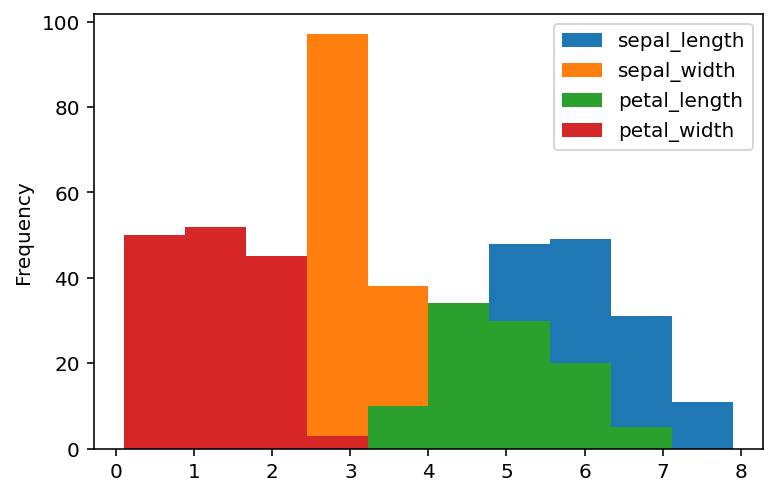

In [20]:
iris.plot.hist()

<AxesSubplot:ylabel='Frequency'>

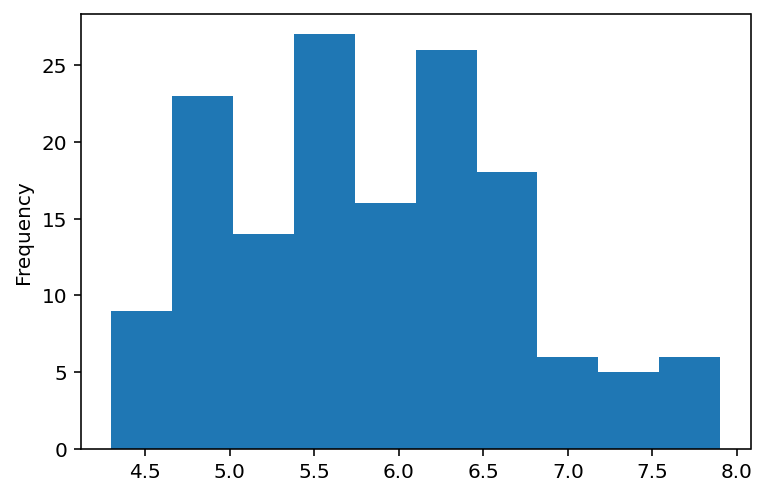

In [21]:
iris['sepal_length'].plot.hist(by='species')

<AxesSubplot:ylabel='Frequency'>

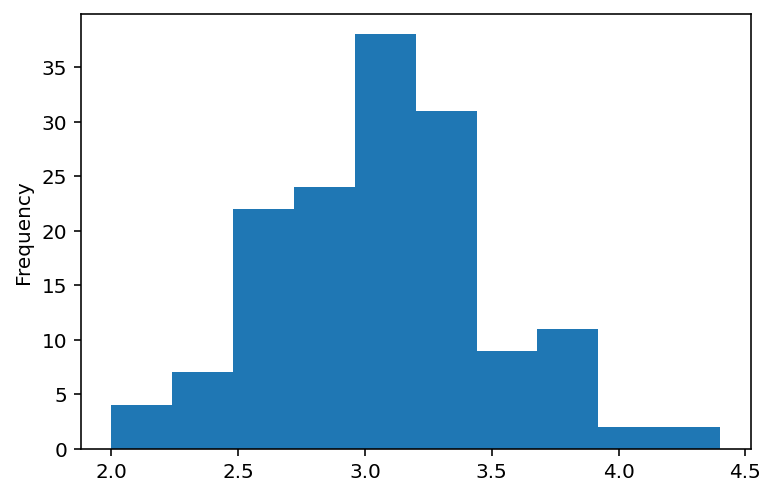

In [22]:
iris['sepal_width'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

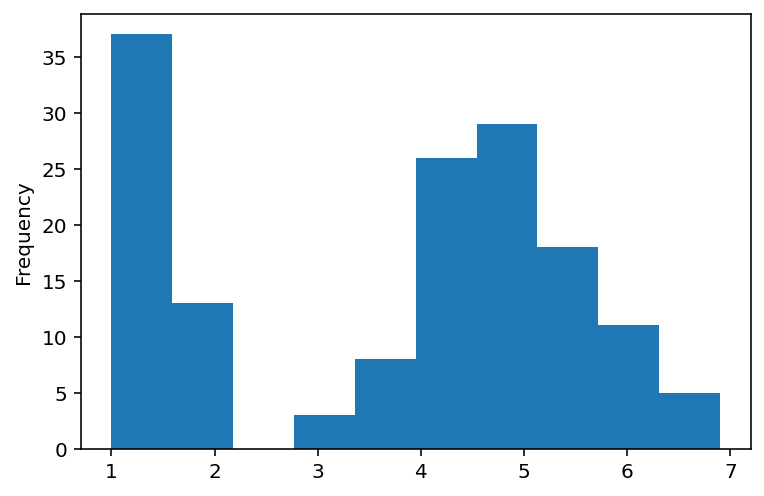

In [23]:
iris.petal_length.plot.hist()

<AxesSubplot:ylabel='Frequency'>

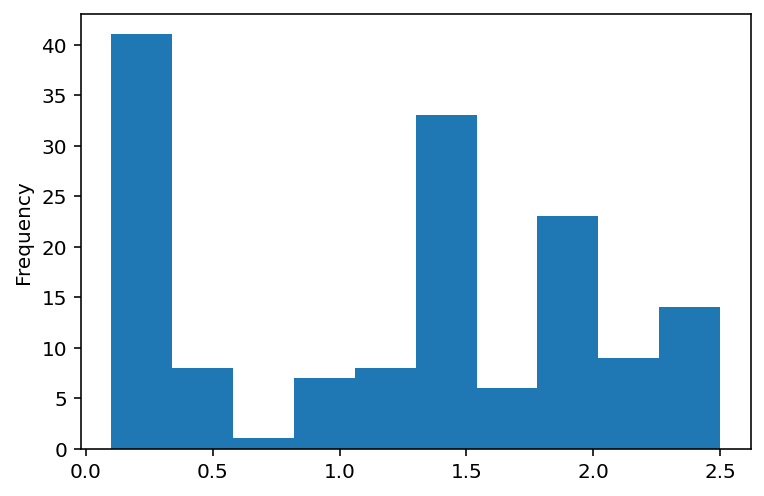

In [24]:
iris.petal_width.plot.hist()

array([[<AxesSubplot:title={'center':'petal_length'}, xlabel='[species]'>,
        <AxesSubplot:title={'center':'petal_width'}, xlabel='[species]'>],
       [<AxesSubplot:title={'center':'sepal_length'}, xlabel='[species]'>,
        <AxesSubplot:title={'center':'sepal_width'}, xlabel='[species]'>]],
      dtype=object)

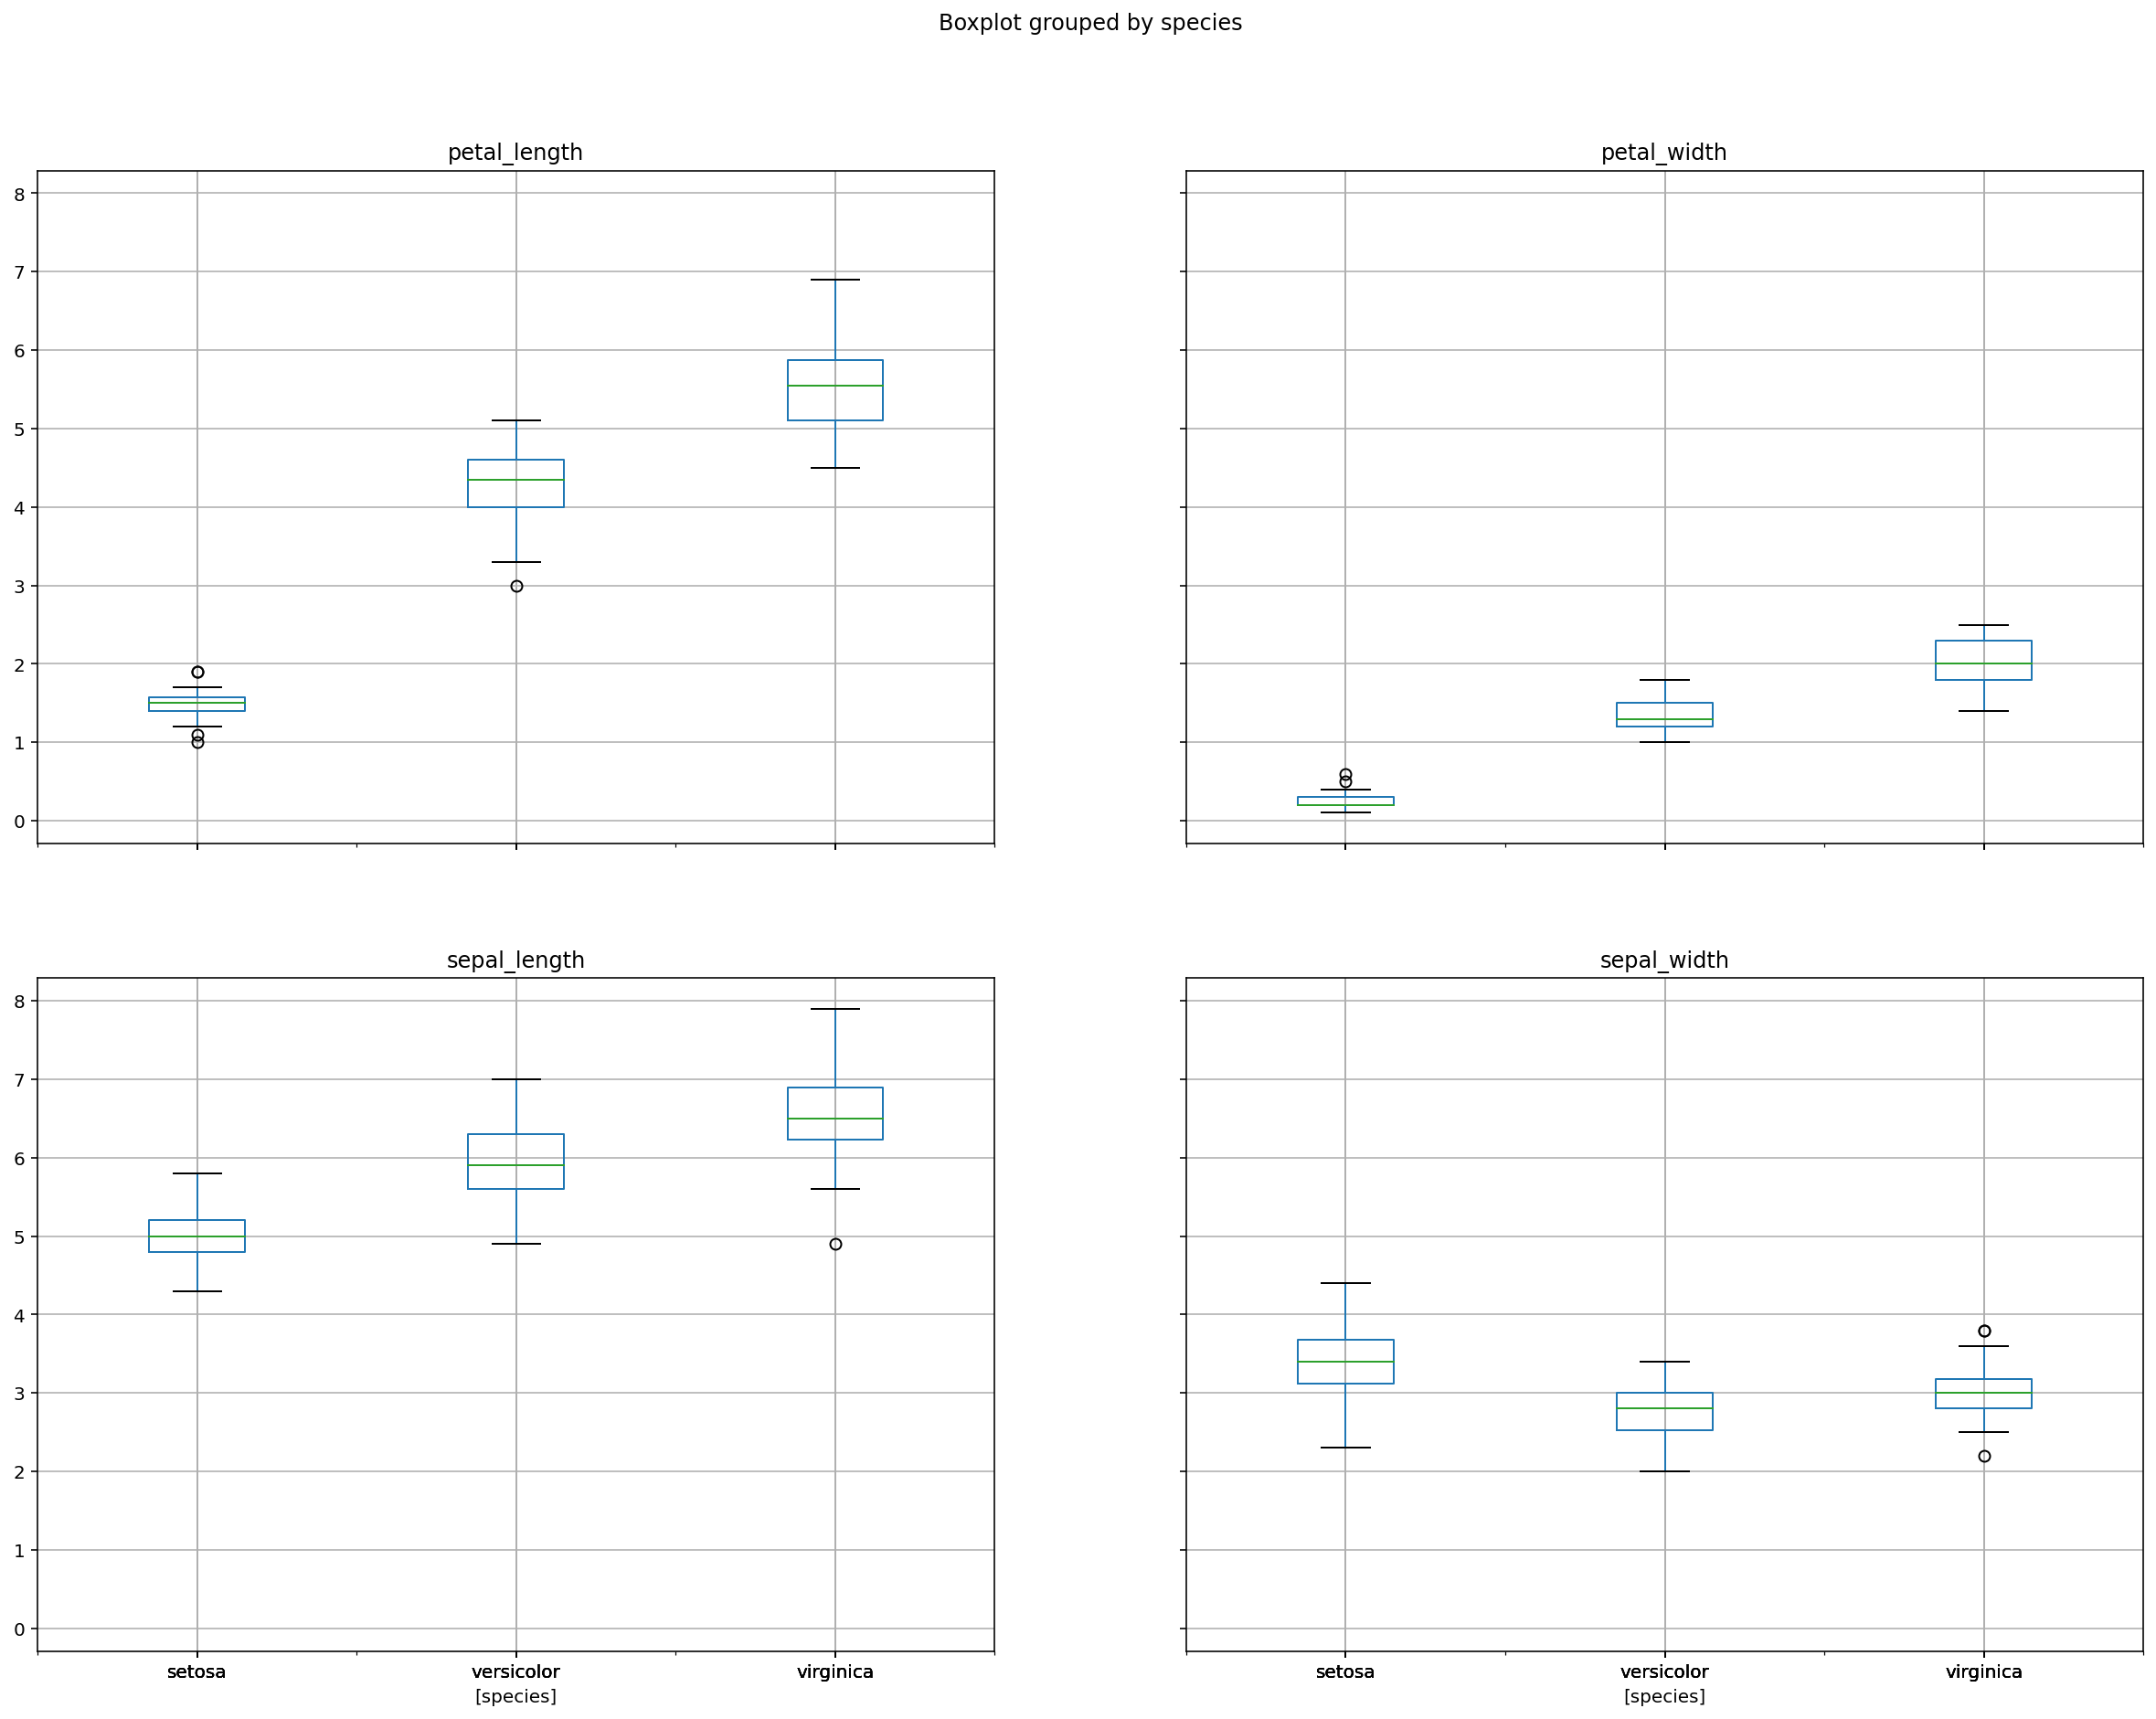

In [25]:
iris.boxplot(by='species', figsize=(20, 15))

### Multidemensional Plots

In [26]:
from pandas.plotting import scatter_matrix


array([[<AxesSubplot:xlabel='sepal_length', ylabel='sepal_length'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>,
        <AxesSubplot:xlabel='petal_length', ylabel='sepal_length'>,
        <AxesSubplot:xlabel='petal_width', ylabel='sepal_length'>],
       [<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='sepal_width'>,
        <AxesSubplot:xlabel='petal_length', ylabel='sepal_width'>,
        <AxesSubplot:xlabel='petal_width', ylabel='sepal_width'>],
       [<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='petal_length'>,
        <AxesSubplot:xlabel='petal_length', ylabel='petal_length'>,
        <AxesSubplot:xlabel='petal_width', ylabel='petal_length'>],
       [<AxesSubplot:xlabel='sepal_length', ylabel='petal_width'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='petal_width'>,
        <AxesSubplot:xlabel='petal_length', ylabel='petal_

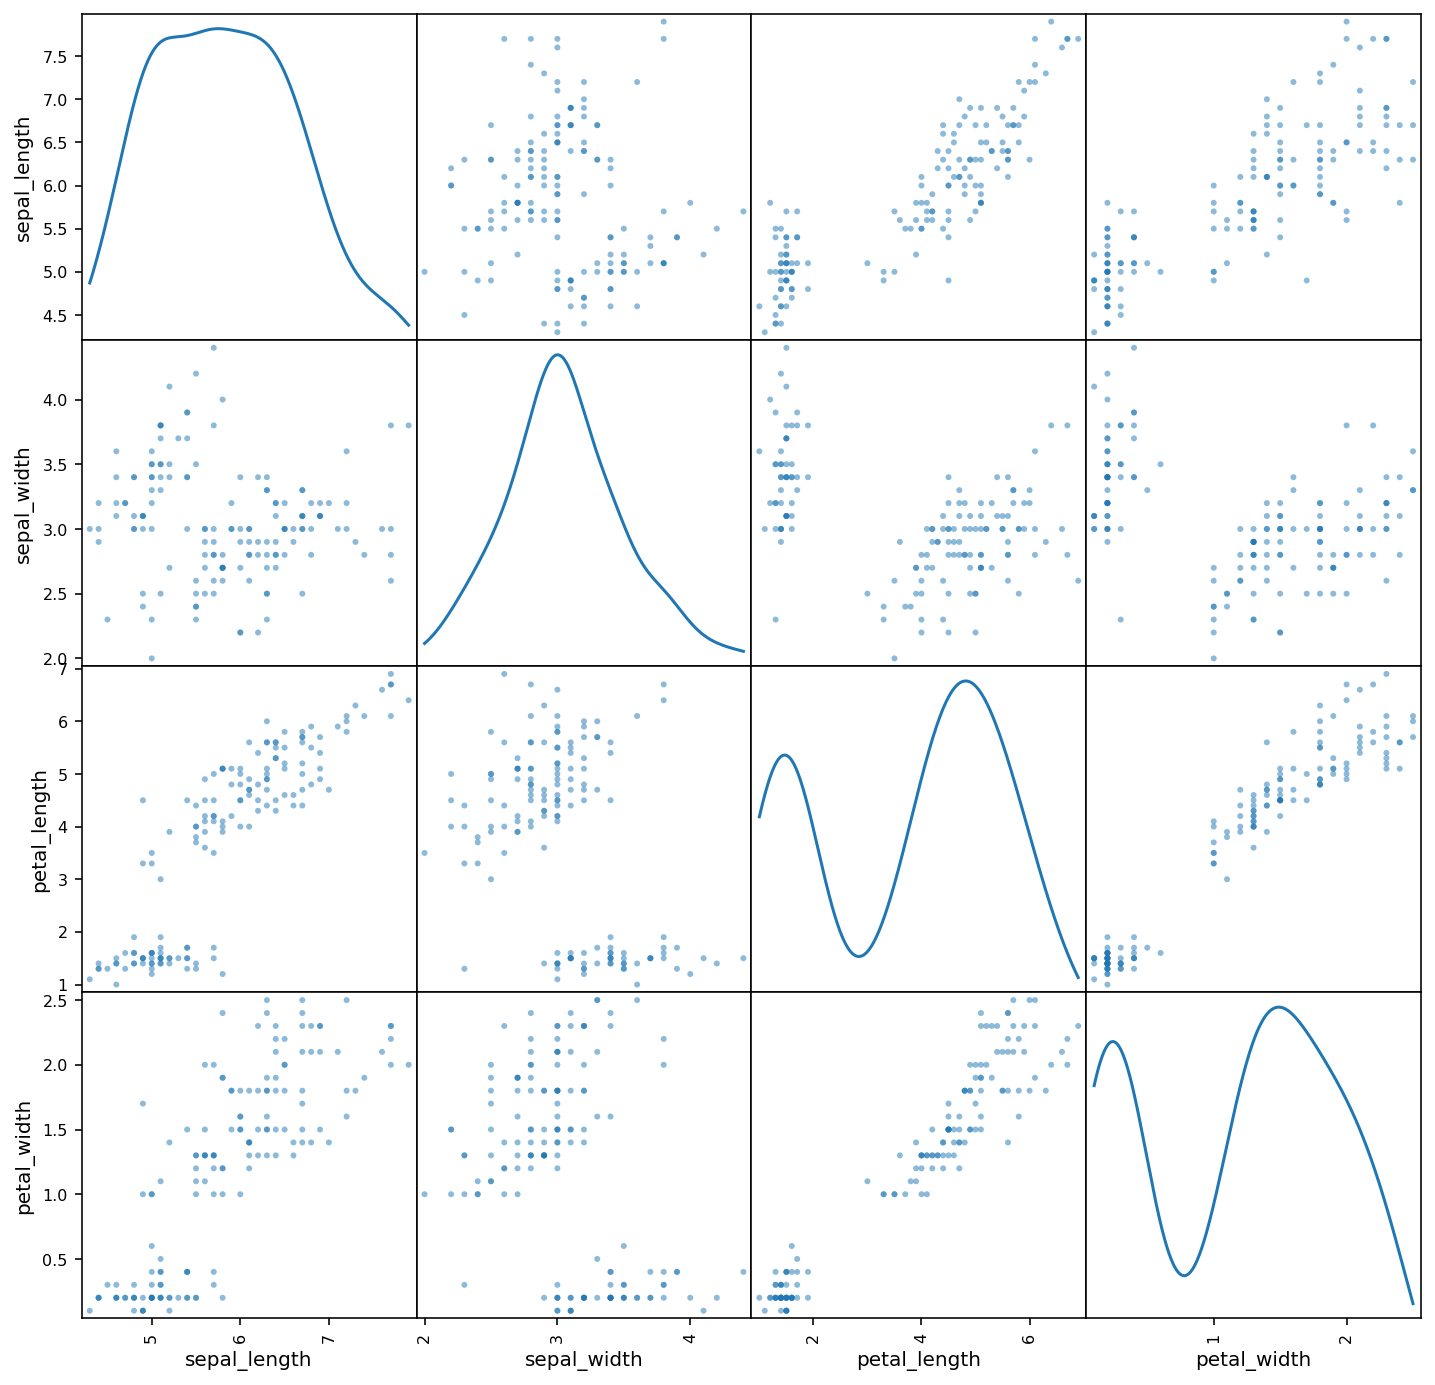

In [27]:
scatter_matrix(iris, figsize=(12, 12), diagonal='kde')

In [28]:
from pandas.plotting import andrews_curves

<AxesSubplot:>

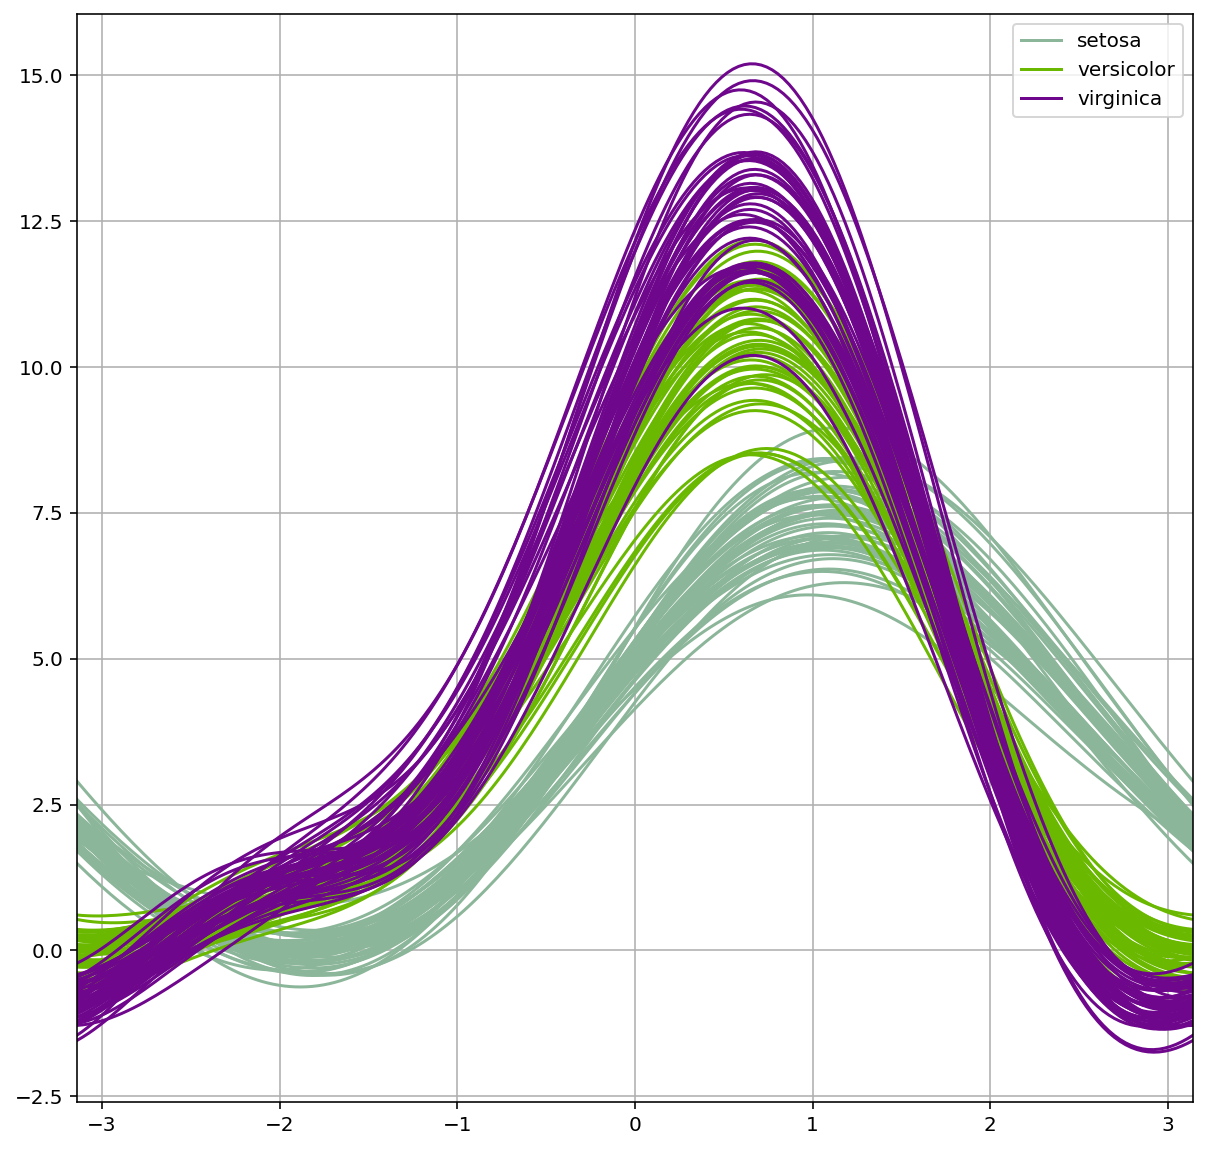

In [29]:
plt.figure(figsize=(10,10))
andrews_curves(iris, 'species')

In [30]:
from pandas.plotting import parallel_coordinates

<AxesSubplot:>

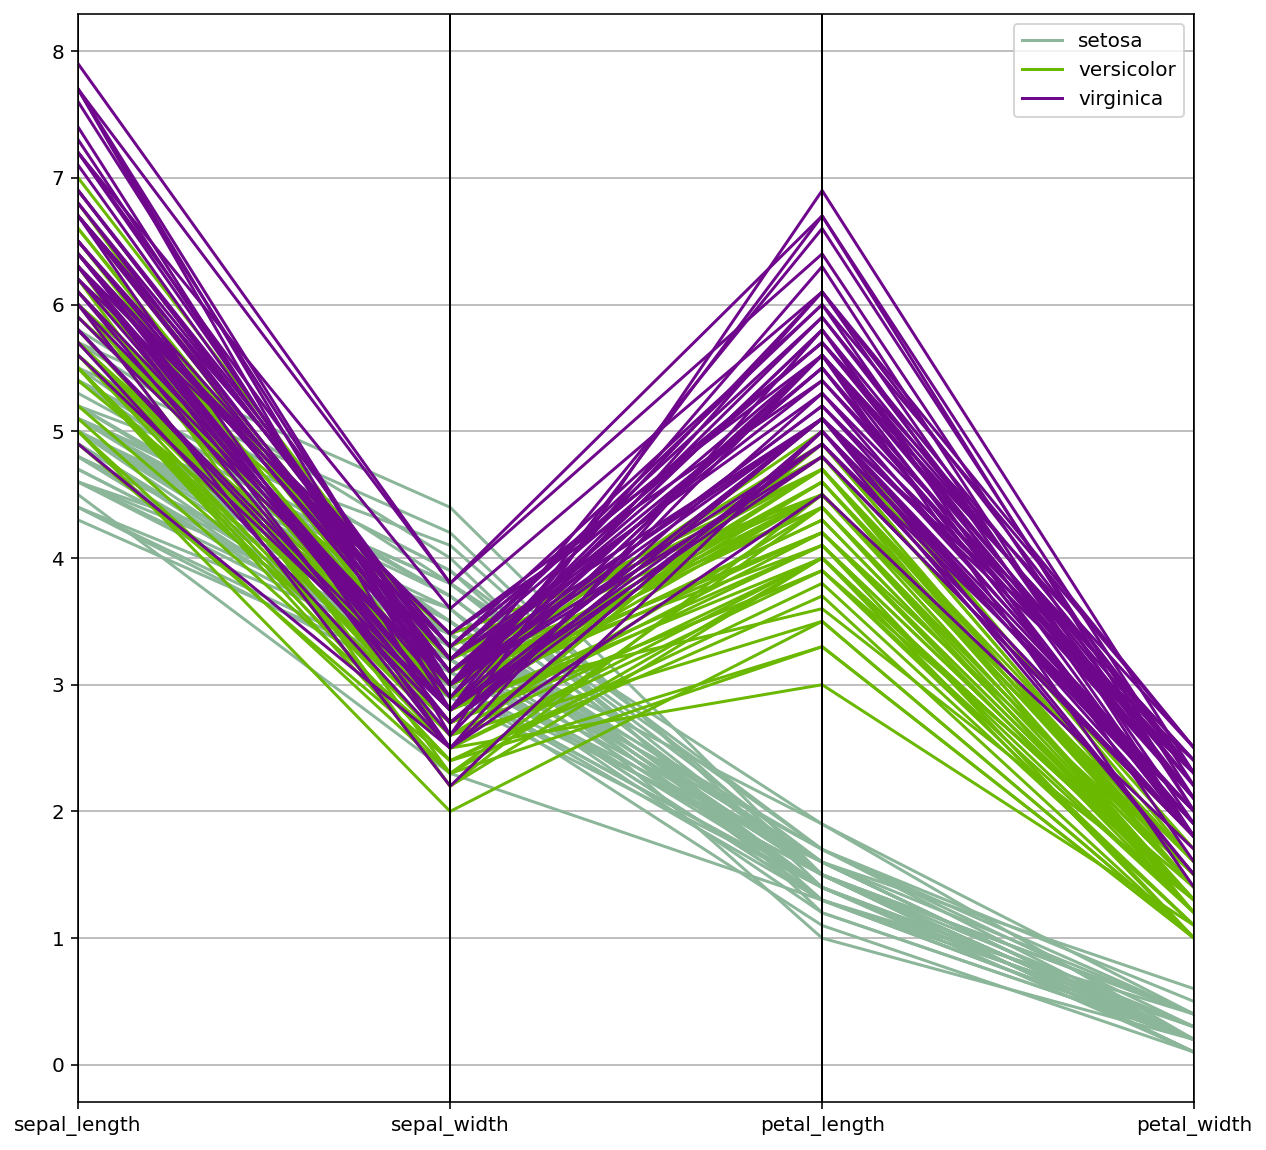

In [31]:
plt.figure(figsize=(10,10))
parallel_coordinates(iris, 'species')

In [32]:
from pandas.plotting import radviz

<AxesSubplot:>

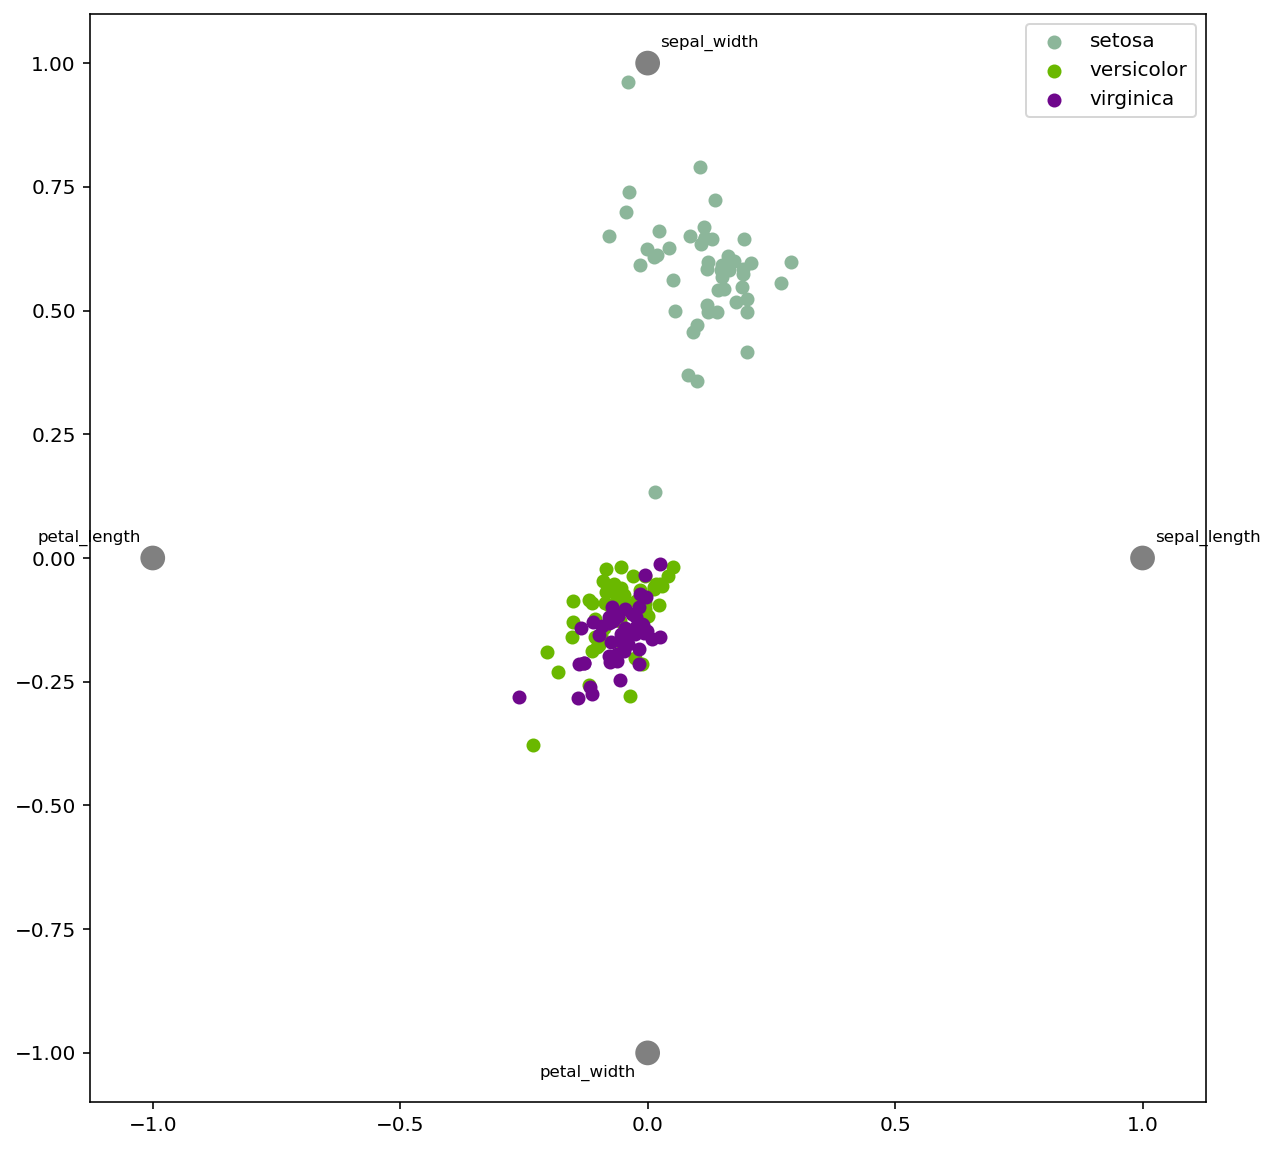

In [33]:
plt.figure(figsize=(10,10))
radviz(iris, 'species')

### Seaborn Visualization

In [34]:
sns.set(color_codes=True)

#### Distributions

c:\Users\balde\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sepal_width', ylabel='Density'>

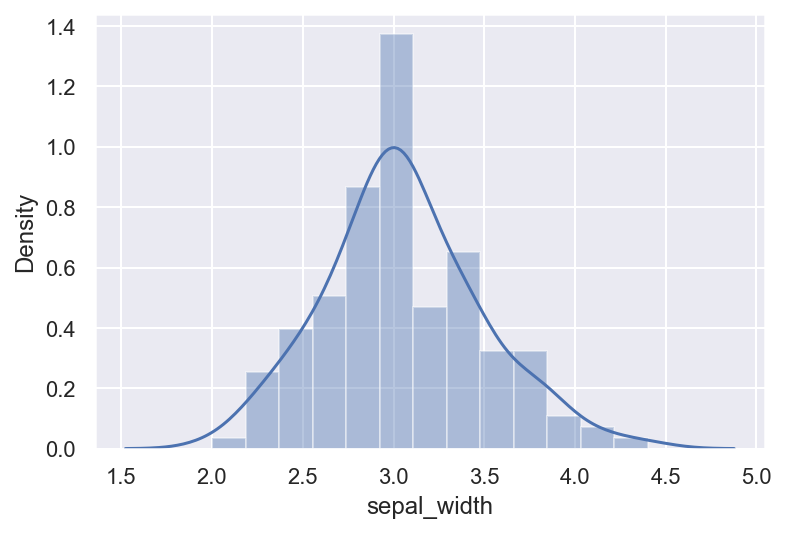

In [37]:
sns.distplot(iris['sepal_width'])

c:\Users\balde\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\balde\Anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sepal_width', ylabel='Density'>

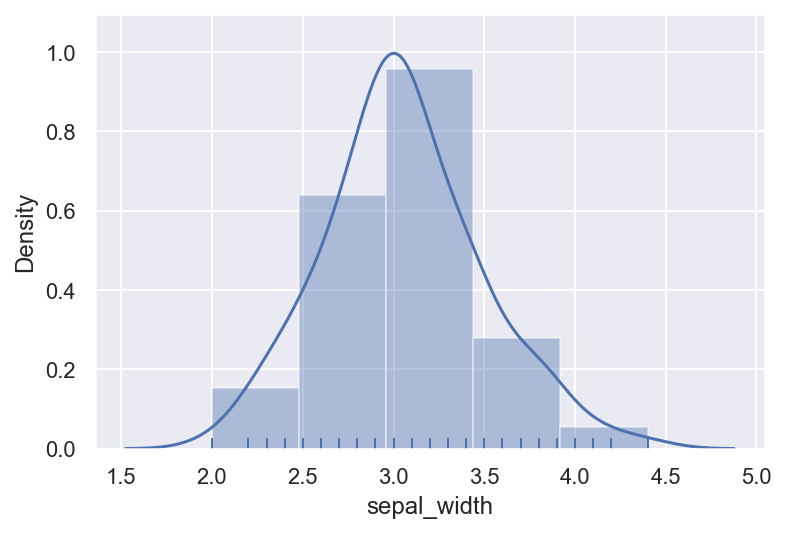

In [38]:
sns.distplot(iris.sepal_width, hist=True, kde=True, rug=True, bins=5)

* Kernerl Density Estimate... can specify the kind f kernel

c:\Users\balde\Anaconda3\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.13 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
c:\Users\balde\Anaconda3\lib\site-packages\seaborn\distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='sepal_width', ylabel='Density'>

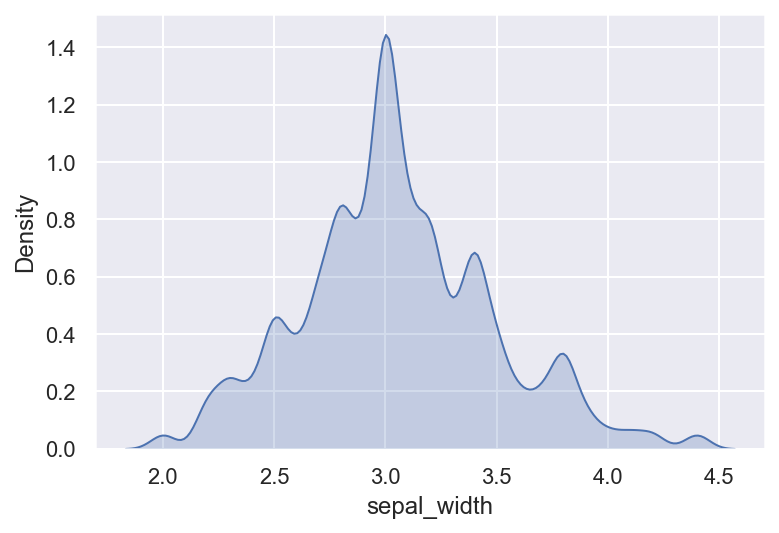

In [39]:
sns.kdeplot(iris.sepal_width, shade=True, kernel='gau', bw=.13)

In [40]:
from scipy import stats

c:\Users\balde\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='petal_width', ylabel='Density'>

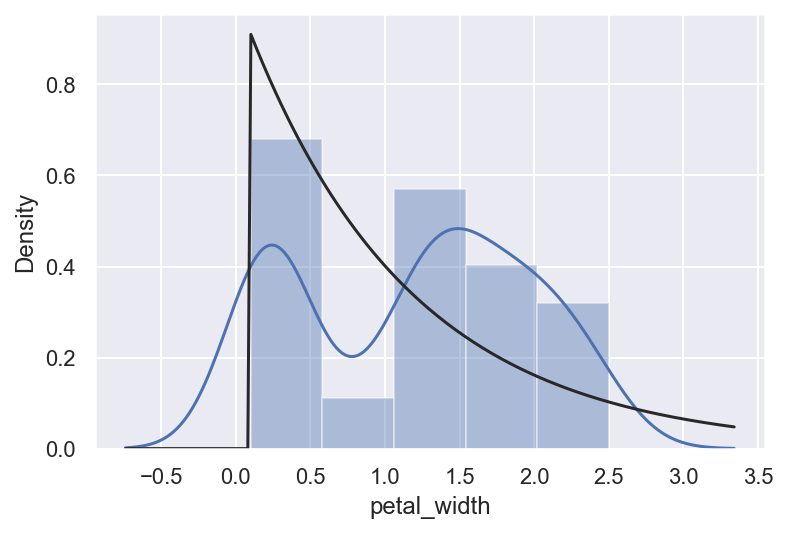

In [41]:
sns.distplot(iris.petal_width, hist=True, kde=True, fit=stats.expon)

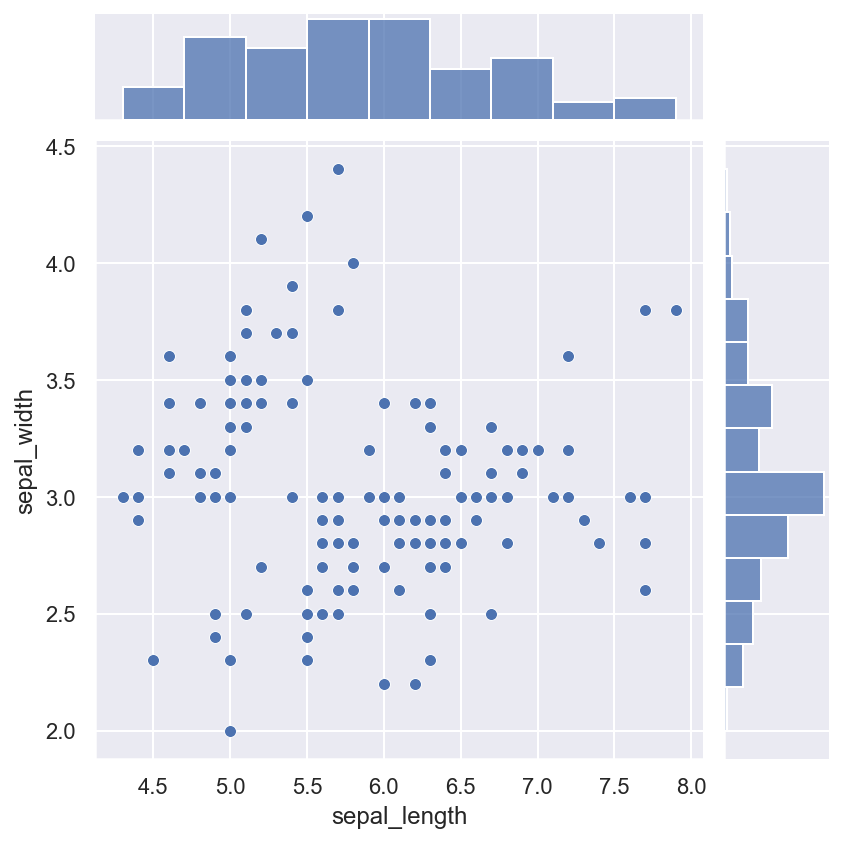

In [42]:
# Joinplot (bivariate distributions)  
sns.jointplot(data=iris, x='sepal_length', y='sepal_width', kind='scatter')

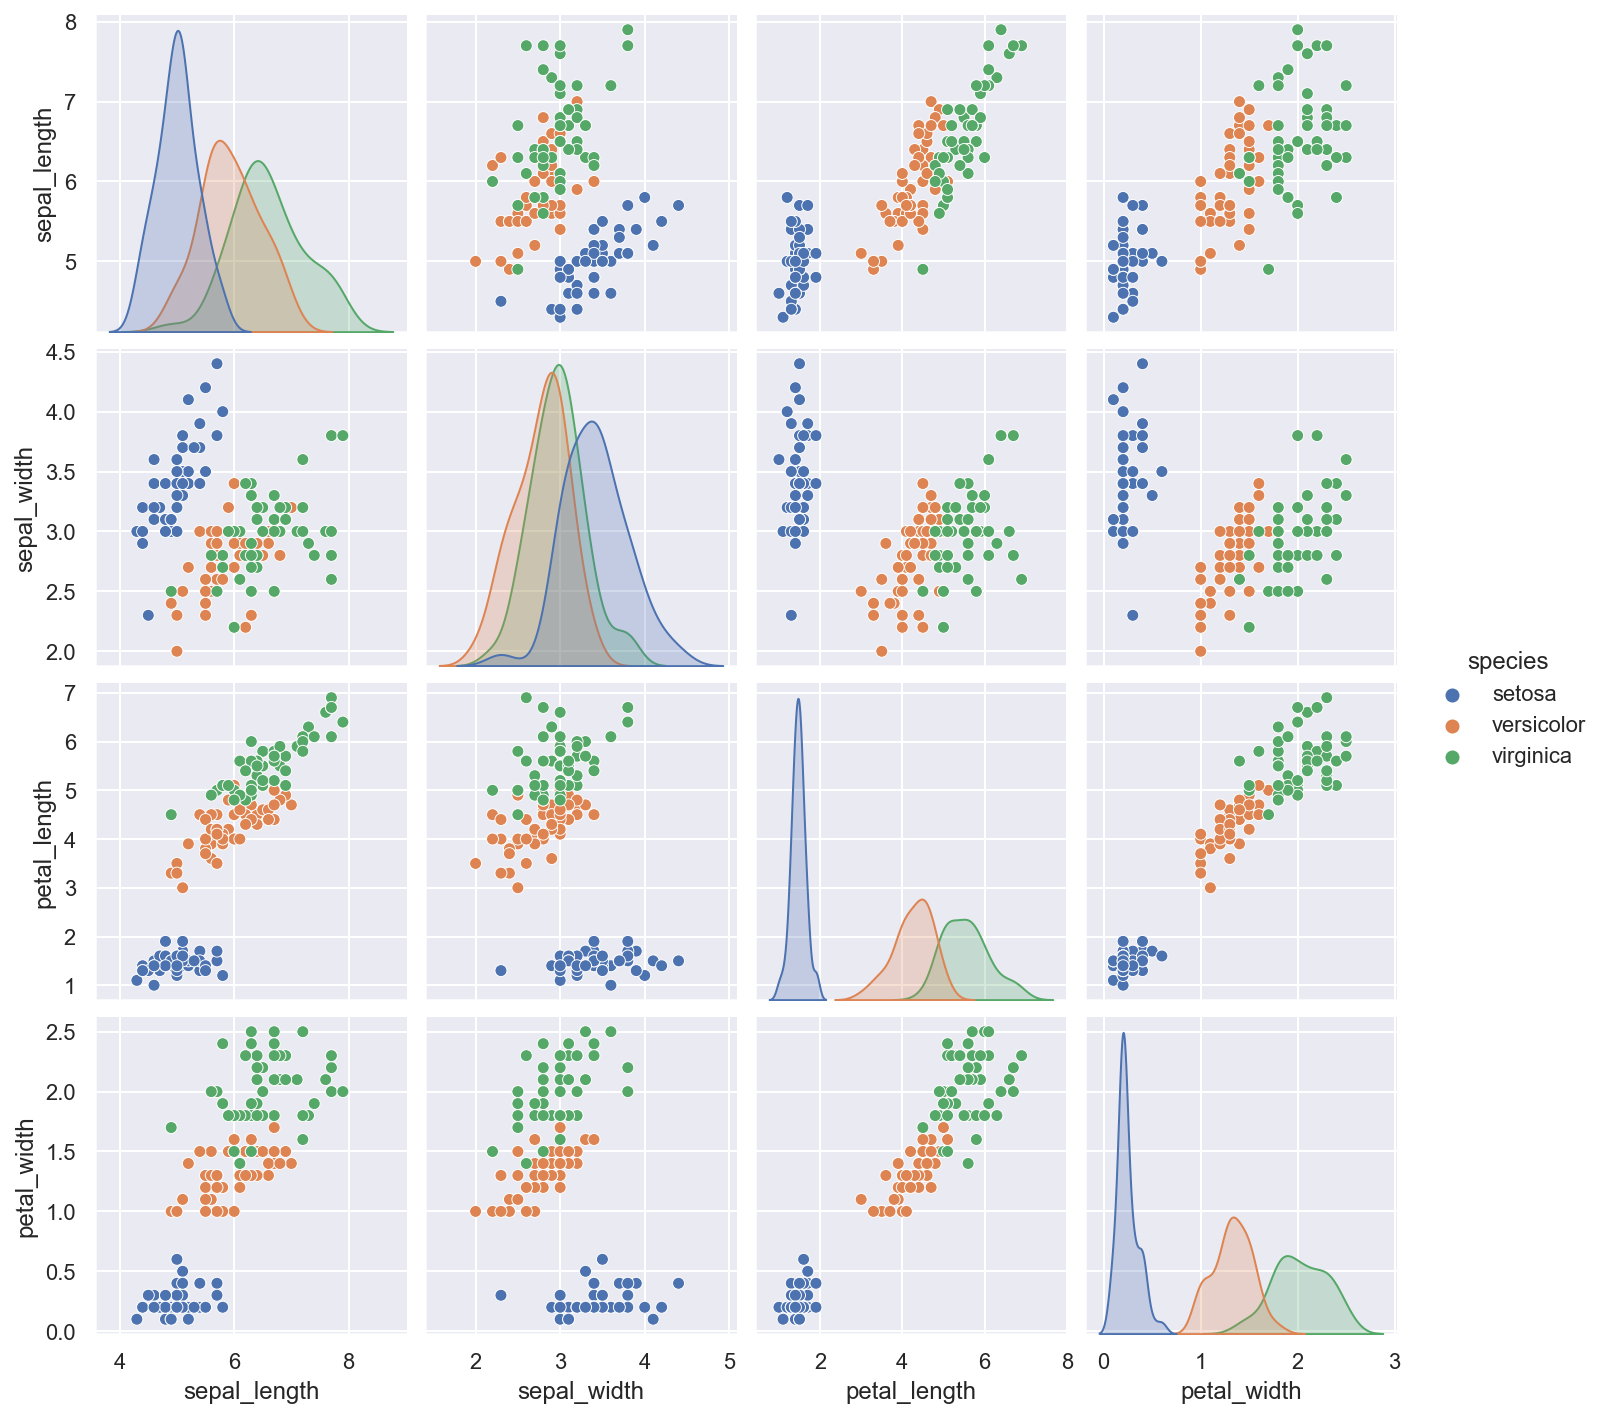

In [43]:
# pairewise relationship
sns.pairplot(iris, hue='species')

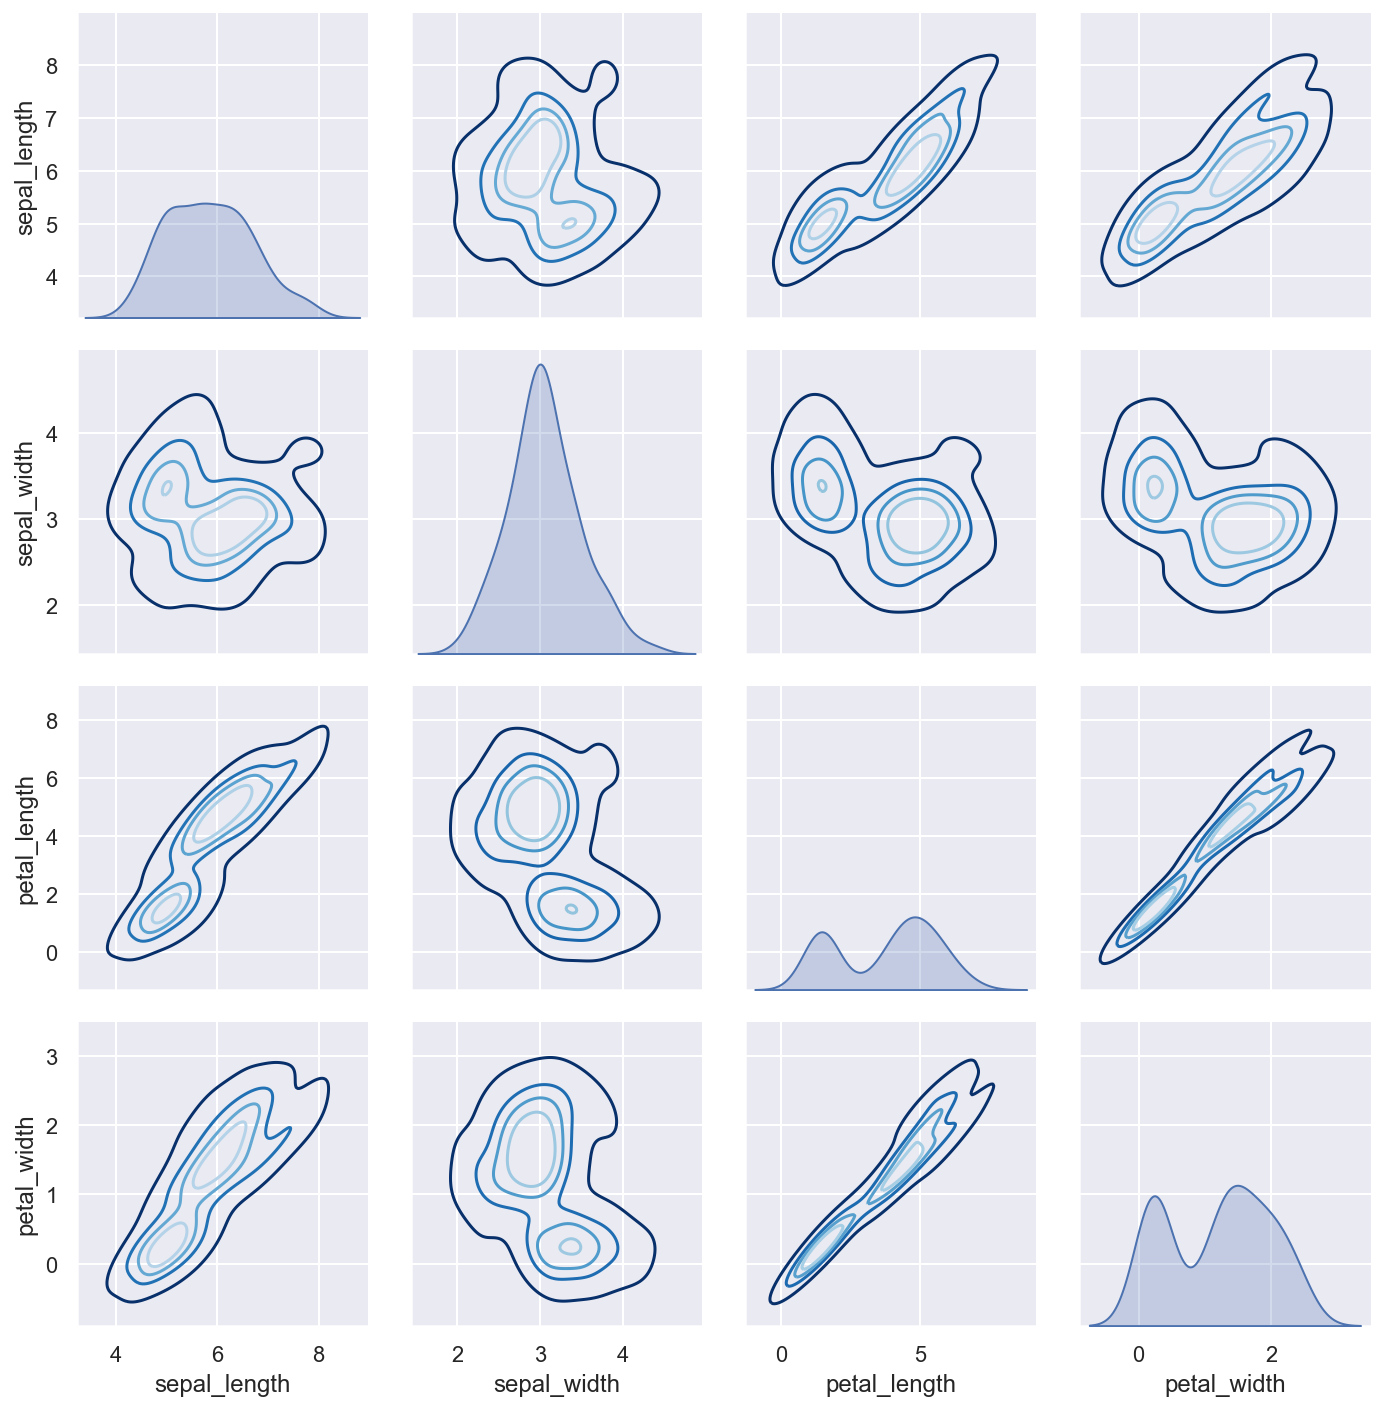

In [44]:
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot, shade=True)
g.map_offdiag(sns.kdeplot, cmap="Blues_r", n_levels=5)

#### Categorical Data

In [45]:
iris['above_sepal_width_mean'] = iris['sepal_width'] > iris['sepal_width'].mean()

**Scatterplot**

<AxesSubplot:xlabel='species', ylabel='sepal_width'>

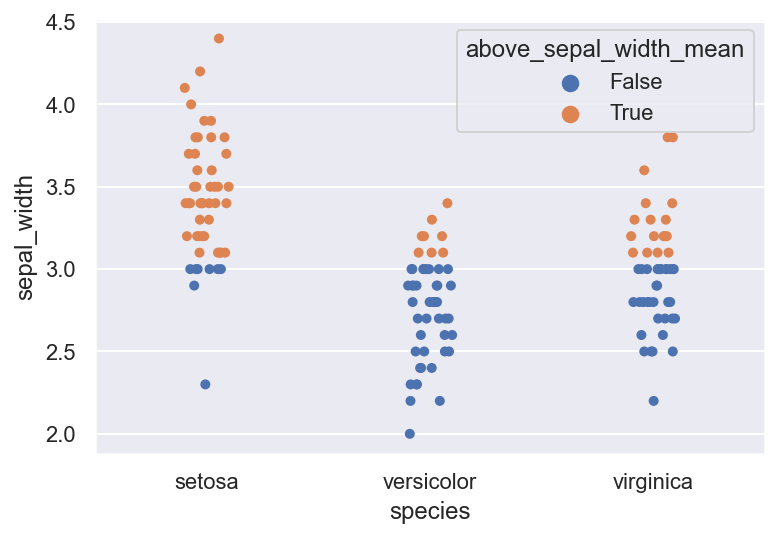

In [46]:
sns.stripplot(data=iris, x='species', y='sepal_width', hue='above_sepal_width_mean', jitter=True)

**Distributions**

<AxesSubplot:xlabel='species', ylabel='sepal_width'>

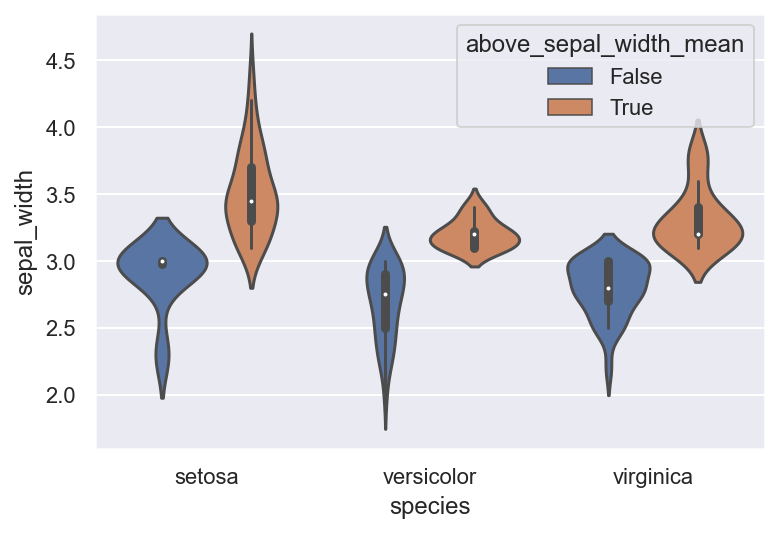

In [47]:
sns.violinplot(data=iris, x='species', y='sepal_width', hue='above_sepal_width_mean', inner='box')

#### Build and Plot Support Vector Machine Classifers

In [48]:
# Convert to sklearn format, grab first 2 columns
X = np.array(iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])[:, :2]

# Convert strings to categorical
le = sklearn.preprocessing.LabelEncoder()
le.fit(iris['species'])
y = le.transform(iris['species'])

c:\Users\balde\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


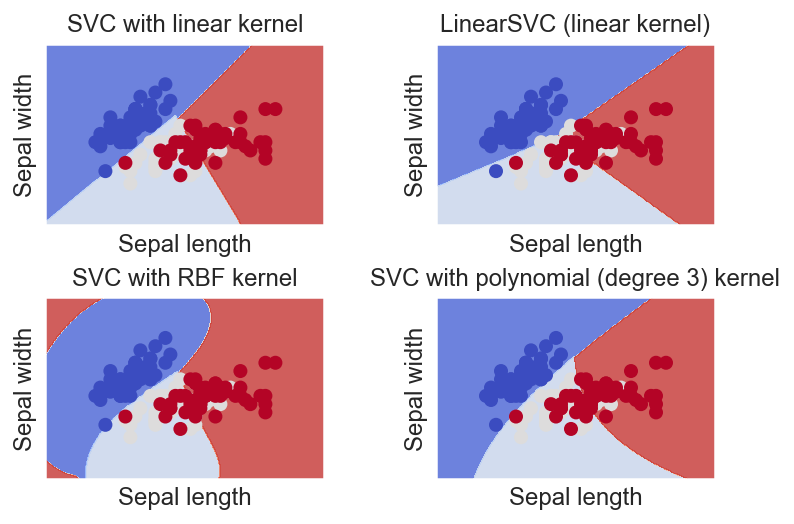

In [49]:
h = .02        # step size in the mesh

# We create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0     # SVM regularization parameter
svc = sklearn.svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = sklearn.svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = sklearn.svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = sklearn.svm.LinearSVC(C=C).fit(X, y)

# Create a mesh to plot in
x_min, x_max = X[:, 0].min() -1, X[:, 0].max() +1
y_min, y_max = X[:, 1].min() -1, X[:, 1].max() +1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Title for the plots
titles = ['SVC with linear kernel',
            'LinearSVC (linear kernel)',
            'SVC with RBF kernel',
            'SVC with polynomial (degree 3) kernel']

for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # PLot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max]
    plt.subplot(2,2, i+1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:,0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()